In [1]:
import pandas as pd

data = "https://raw.githubusercontent.com/statds/ids-s22/main/notes/data/nyc_DobJobApp_2021.csv"

dob_job = pd.read_csv(data)

dob_job

c:\users\taffe\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3427: DtypeWarning: Columns (23,24,25,26,29,31,32,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673512,1,QUEENS,10040,222 STREET,10780,19,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27.0,568.0,Queens Village,4231025.0
1,440673497,1,QUEENS,215-02,93 AVENUE,10618,28,4226672,A2,X,...,N,NaN,A1,0,40.720067,-73.742696,23.0,542.0,Queens Village,4226672.0
2,340810947,1,BROOKLYN,770,RUGBY ROAD,6688,34,3178977,A2,R,...,N,NaN,A1,0,40.630504,-73.963353,45.0,528.0,Flatbush,3178977.0
3,340810910,1,BROOKLYN,39,RUTLAND ROAD,5034,90,3115124,A2,R,...,N,NaN,B3,0,40.658878,-73.959067,40.0,79801.0,Prospect Lefferts Gardens-Wingate,3115124.0
4,340810956,1,BROOKLYN,200,LINCOLN ROAD,5029,18,3114725,A2,X,...,N,NaN,A5,0,40.661240,-73.955847,40.0,800.0,Prospect Lefferts Gardens-Wingate,3114725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20082,141001653,1,MANHATTAN,64,NORFOLK STREET,346,37,1091637,A3,R,...,N,NaN,D7,0,40.717296,-73.987922,1.0,1402.0,Lower East Side,1000000.0
20083,103505146,1,MANHATTAN,1774,AMSTERDAM AVENUE,2079,36,1061989,A2,R,...,N,NaN,C7,0,40.826978,-73.946342,7.0,233.0,Hamilton Heights,1061989.0
20084,300972124,1,BROOKLYN,1855,STILLWELL AVENUE,6667,24,3177680,PA,U,...,NaN,NaN,W1,0,40.601433,-73.986139,47.0,404.0,Bensonhurst East,3177680.0
20085,300972133,1,BROOKLYN,1855,STILLWELL AVENUE,6667,24,3177680,PA,U,...,NaN,NaN,W1,0,40.601433,-73.986139,47.0,404.0,Bensonhurst East,3177680.0


In [2]:
dob_job.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [3]:
from datetime import datetime
import math

approved = [datetime.strptime(i, "%m/%d/%Y") for i in dob_job["Approved"]]
paid = [datetime.strptime(i, "%m/%d/%Y") for i in dob_job["Fully Paid"]]

dob_job['acceptance_time'] = [math.fabs((approved[i] - paid[i]).days) \
                                          for i in range(len(dob_job))]

In [4]:
dob_job['City Owned'] = [1 if val == 'Y' else 0 for val in dob_job['City Owned']]
dob_job['City Owned'].value_counts()

0    17705
1     2382
Name: City Owned, dtype: int64

In [5]:
city_filter_yes = dob_job.loc[(dob_job['City Owned'] == 1), \
                                     ['City Owned', 'acceptance_time']]
city_filter_no = dob_job.loc[(dob_job['City Owned'] == 0), \
                                    ['City Owned', 'acceptance_time']]


In [6]:
def wait_avg(col):
    days = [int(val) for val in col['acceptance_time']]
    avg_days = sum(days)/len(days)
    return avg_days

yes, no = (wait_avg(city_filter_yes), wait_avg(city_filter_no))

yes, no, no/yes

(72.03946263643996, 117.59254447896075, 1.6323351143304963)

In [7]:
# Test null hypothesis acceptance_time is independent of city ownership (beta city ownership = 0)

city_filter_yes

,City Owned,acceptance_time
6,1,0.0
19,1,0.0
21,1,121.0
24,1,14.0
37,1,0.0
...,...,...
20017,1,0.0
20055,1,0.0
20066,1,0.0
20067,1,0.0


In [8]:
temp = pd.crosstab(index = dob_job["acceptance_time"], \
                   columns = dob_job["City Owned"])

temp

City Owned,0,1
acceptance_time,,
0.0,5717,655
1.0,846,283
2.0,561,142
3.0,379,135
4.0,343,116
...,...,...
4349.0,1,0
4363.0,2,0
4375.0,1,0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

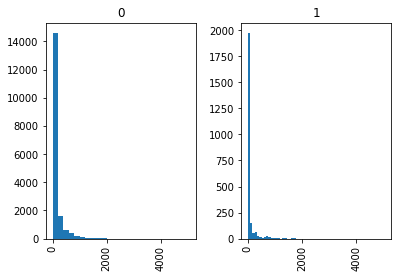

In [41]:
dob_job['acceptance_time'].hist(by = dob_job['City Owned'], bins = 25, sharex = True)

In [10]:
test = pd.concat([city_filter_yes, city_filter_no], axis = 0)

test.corr()

# The correlation coefficient is very close to 0, -0.059, so it is likely there is 
# no significnat relationship between application acceptance time and city ownership.

,City Owned,acceptance_time
City Owned,1.000000,-0.059182
acceptance_time,-0.059182,1.000000


In [11]:
wait_avg(dob_job)

# Average wait time of all buildings

112.1906705829641

In [12]:
time = pd.crosstab(index = dob_job["City Owned"], \
                   columns = dob_job["acceptance_time"] > 112)
time

# Using above avg (now both categorical)
# WHAT TO DO WITH??

acceptance_time,False,True
City Owned,,
0,13102,4603
1,2034,348


In [16]:
# Correlation between categorical variables?

oddsratio, p = ss.fisher_exact(time)
print(p)

# P-value v. small - reject Ho
# Possible correlation beteween city owned and if acceptance_time is longer than the mean (112 days)

6.798966927202587e-37


In [22]:
dob_job_filt = dob_job[['acceptance_time', 'City Owned', 'Borough', 'Building Type', 'Job Type']]

dob_job_filt.columns = ['acceptance_time', 'city_owned', 'borough', 'building_type', 'job_type']
dob_job_filt

,acceptance_time,city_owned,borough,building_type,job_type
0,0.0,0,QUEENS,1-2-3 FAMILY,A2
1,0.0,0,QUEENS,1-2-3 FAMILY,A2
2,0.0,0,BROOKLYN,1-2-3 FAMILY,A2
3,6.0,0,BROOKLYN,1-2-3 FAMILY,A2
4,5.0,0,BROOKLYN,1-2-3 FAMILY,A2
...,...,...,...,...,...
20082,0.0,0,MANHATTAN,OTHERS,A3
20083,22.0,0,MANHATTAN,OTHERS,A2
20084,0.0,0,BROOKLYN,OTHERS,PA
20085,0.0,0,BROOKLYN,OTHERS,PA


In [26]:
import scipy.stats as ss
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Regression on model:
# 1. acceptance time on city owned alone


myPois = smf.glm(formula = 'acceptance_time ~ city_owned', data = dob_job_filt,
                 family = sm.families.Poisson()).fit()

myPois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        acceptance_time   No. Observations:                20087
Model:                            GLM   Df Residuals:                    20085
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9742e+06
Date:                Mon, 07 Mar 2022   Deviance:                   5.8730e+06
Time:                        11:07:11   Pearson chi2:                 1.10e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.8869
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7672      0.001   6878.656      0.000       4.766       4.769
city_owned    -0.4900      0.003   -195.103      0.000      -0.495      -0.485
==============================================================================
"""

In [27]:
# 2. acceptance time on borough(5), city owned (2 - binary), building type (2), job type (5)

myPois2 = smf.glm(formula = 'acceptance_time ~ city_owned + borough + building_type + job_type', 
                  data = dob_job_filt, family = sm.families.Poisson()).fit()

myPois2.summary()

# Reference (Bronx, 1-2-3 Family)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        acceptance_time   No. Observations:                20087
Model:                            GLM   Df Residuals:                    20075
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0681e+06
Date:                Mon, 07 Mar 2022   Deviance:                   4.0608e+06
Time:                        11:13:22   Pearson chi2:                 7.49e+06
No. Iterations:                    31   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.1296      0.003   1924.782      0.000       5.124       5.135
borough[T.BROOKLYN]          0.1272      0.002     58.435      0.000       0.123       0.131
borough[T.MANHATTAN]        -0.0041      0.002     -1.690      0.091      -0.009       0.001
borough[T.QUEENS]           -0.1292      0.002    -54.446      0.000      -0.134      -0.125
borough[T.STATEN ISLAND]    -0.2458      0.003    -77.998      0.000      -0.252      -0.240
building_type[T.OTHERS]      0.6916      0.002    410.053      0.000       0.688       0.695
job_type[T.A2]              -1.3382      0.002   -701.976      0.000      -1.342      -1.335
job_type[T.A3]              -0.2635      0.002   -127.193      0.000      -0.268      -0.259
job_type[T.DM]             -32.2598   1.13e+04     -0.003      0.998   -2.22e+04    2.22e+04
job_type[T.NB]               0.3110      0.002    146.846      0.000       0.307       0.315
job_type[T.PA]               0.0356      0.005      7.141      0.000       0.026       0.045
city_owned                  -0.2497      0.003    -97.240      0.000      -0.255      -0.245
============================================================================================
"""

In [37]:
myPois3 = smf.glm(formula = 'acceptance_time ~ job_type', 
                  data = dob_job_filt, family = sm.families.Poisson()).fit()

myPois3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        acceptance_time   No. Observations:                20087
Model:                            GLM   Df Residuals:                    20081
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2291e+06
Date:                Mon, 07 Mar 2022   Deviance:                   4.3827e+06
Time:                        11:43:44   Pearson chi2:                 9.03e+06
No. Iterations:                    31   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.5589      0.001   3749.573      0.000       5.556       5.562
job_type[T.A2]    -1.4662      0.002   -787.099      0.000      -1.470      -1.463
job_type[T.A3]    -0.1847      0.002    -90.105      0.000      -0.189      -0.181
job_type[T.DM]   -32.5319   1.19e+04     -0.003      0.998   -2.34e+04    2.34e+04
job_type[T.NB]     0.2310      0.002    111.009      0.000       0.227       0.235
job_type[T.PA]     0.3074      0.005     61.872      0.000       0.298       0.317
==================================================================================
"""

In [39]:
myPois4 = smf.glm(formula = 'acceptance_time ~ borough', 
                  data = dob_job_filt, family = sm.families.Poisson()).fit()

myPois4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        acceptance_time   No. Observations:                20087
Model:                            GLM   Df Residuals:                    20082
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9410e+06
Date:                Mon, 07 Mar 2022   Deviance:                   5.8065e+06
Time:                        11:44:03   Pearson chi2:                 1.09e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9959
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.7747      0.002   2567.169      0.000       4.771       4.778
borough[T.BROOKLYN]          0.1593      0.002     73.445      0.000       0.155       0.164
borough[T.MANHATTAN]         0.0918      0.002     38.675      0.000       0.087       0.096
borough[T.QUEENS]           -0.3025      0.002   -130.544      0.000      -0.307      -0.298
borough[T.STATEN ISLAND]    -0.4428      0.003   -147.221      0.000      -0.449      -0.437
============================================================================================
"""

In [40]:
myPois5 = smf.glm(formula = 'acceptance_time ~ building_type', 
                  data = dob_job_filt, family = sm.families.Poisson()).fit()

myPois5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        acceptance_time   No. Observations:                20087
Model:                            GLM   Df Residuals:                    20085
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7436e+06
Date:                Mon, 07 Mar 2022   Deviance:                   5.4118e+06
Time:                        11:44:08   Pearson chi2:                 1.02e+07
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1386      0.001   3384.014      0.000       4.136       4.141
building_type[T.OTHERS]     0.9863      0.001    676.324      0.000       0.983       0.989
===========================================================================================
"""